# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_csv/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities


['khatanga',
 'punta arenas',
 'santa cruz cabralia',
 'san patricio',
 'alpine',
 'tabou',
 'vardo',
 'kapaa',
 'rikitea',
 'busselton',
 'kosino',
 'olinda',
 'bakchar',
 'okitipupa',
 'bengkulu',
 'isabela',
 'thompson',
 'phan thiet',
 'ushuaia',
 'broken hill',
 'parabel',
 'vaitupu',
 'victoria',
 'hermanus',
 'sibolga',
 'taltal',
 'panaba',
 'severo-kurilsk',
 'magadan',
 'nikolskoye',
 'sistranda',
 'lebu',
 'winneba',
 'teya',
 'butaritari',
 'pisco',
 'mahebourg',
 'coquimbo',
 'sorvag',
 'tasiilaq',
 'puerto ayora',
 'marawi',
 'kajaani',
 'tuktoyaktuk',
 'ashington',
 'vaini',
 'rantepao',
 'ribeira grande',
 'saint-philippe',
 'kodiak',
 'bathsheba',
 'kaeo',
 'komsomolskiy',
 'bluff',
 'geraldton',
 'berezovyy',
 'namibe',
 'georgetown',
 'kaitangata',
 'vilhena',
 'meadow lake',
 'imbituba',
 'road town',
 'katsuura',
 'moree',
 'avarua',
 'souillac',
 'gizo',
 'east london',
 'tomohon',
 'gazli',
 'ola',
 'vao',
 'pevek',
 'redcar',
 'nizhneyansk',
 'bethel',
 'levelek

In [3]:
print(len(cities))

610


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#url - found on https://openweathermap.org/current
url = "http://api.openweathermap.org/data/2.5/weather?"

#create lists
city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Set loop
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        long.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        cloudiness.append(response["clouds"])
        
        print(f"Processing record {i}|{city}")
        i+=1
        
    except (KeyError):
        print("City not found. Skipping.")

Processing record 1|khatanga
Processing record 2|punta arenas
Processing record 3|santa cruz cabralia
Processing record 4|san patricio
Processing record 5|alpine
Processing record 6|tabou
Processing record 7|vardo
Processing record 8|kapaa
Processing record 9|rikitea
Processing record 10|busselton
Processing record 11|kosino
Processing record 12|olinda
Processing record 13|bakchar
Processing record 14|okitipupa
Processing record 15|bengkulu
Processing record 16|isabela
Processing record 17|thompson
Processing record 18|phan thiet
Processing record 19|ushuaia
Processing record 20|broken hill
Processing record 21|parabel
City not found. Skipping.
Processing record 22|victoria
Processing record 23|hermanus
Processing record 24|sibolga
Processing record 25|taltal
Processing record 26|panaba
Processing record 27|severo-kurilsk
Processing record 28|magadan
Processing record 29|nikolskoye
Processing record 30|sistranda
Processing record 31|lebu
Processing record 32|winneba
Processing record 3

Processing record 250|margate
City not found. Skipping.
Processing record 251|mlonggo
Processing record 252|batsfjord
Processing record 253|necochea
Processing record 254|byron bay
Processing record 255|ketchikan
Processing record 256|dudinka
Processing record 257|carutapera
Processing record 258|sindor
Processing record 259|matara
City not found. Skipping.
Processing record 260|northam
City not found. Skipping.
Processing record 261|singarayakonda
Processing record 262|opuwo
Processing record 263|abha
Processing record 264|lompoc
Processing record 265|itoman
Processing record 266|waipawa
Processing record 267|praia
Processing record 268|camabatela
Processing record 269|faya
Processing record 270|acari
Processing record 271|dingle
Processing record 272|tiksi
Processing record 273|bud
Processing record 274|suwannaphum
Processing record 275|igarka
Processing record 276|twentynine palms
Processing record 277|ambon
Processing record 278|marrakesh
Processing record 279|soyo
Processing recor

Processing record 495|ambilobe
Processing record 496|chachapoyas
Processing record 497|murree
Processing record 498|axim
Processing record 499|yarada
Processing record 500|san juan
Processing record 501|shache
Processing record 502|hasaki
Processing record 503|banjarmasin
Processing record 504|yanam
Processing record 505|saint-augustin
City not found. Skipping.
Processing record 506|adrar
Processing record 507|veraval
Processing record 508|kirakira
Processing record 509|aktash
Processing record 510|guadalupe y calvo
Processing record 511|liusha
Processing record 512|mehamn
Processing record 513|verkhoyansk
Processing record 514|suntar
Processing record 515|uribia
Processing record 516|bonavista
Processing record 517|kibala
Processing record 518|sirnak
Processing record 519|qui nhon
Processing record 520|sechura
Processing record 521|urumqi
Processing record 522|bojnurd
Processing record 523|conde
Processing record 524|andenes
Processing record 525|naze
Processing record 526|la reforma


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create Dataframe


weather_df = {
    "City":city_name,
    "Lat":lat,
    "Long":long,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date,
}


#Display DF
weather_df =pd.DataFrame(weather_df)
weather_df.head()



,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,269.25,97,{'all': 100},4.82,RU,1633533914
1,Punta Arenas,-53.1500,-70.9167,284.21,54,{'all': 0},9.26,CL,1633533914
2,Santa Cruz Cabrália,-16.2781,-39.0247,300.28,65,{'all': 40},4.63,BR,1633533914
3,San Patricio,28.0170,-97.5169,300.32,52,{'all': 3},0.49,US,1633533915
4,Alpine,32.8350,-116.7664,291.11,90,{'all': 90},2.57,US,1633533915


In [6]:
weather_df= weather_df.rename_axis('City ID')

#Exporting data to csv
weather_df.to_csv("output_csv/city.csv")

In [7]:
humidity

[97,
 54,
 65,
 52,
 90,
 76,
 76,
 81,
 79,
 71,
 84,
 70,
 76,
 84,
 90,
 84,
 57,
 91,
 66,
 27,
 85,
 79,
 59,
 87,
 61,
 64,
 72,
 52,
 61,
 78,
 45,
 81,
 94,
 71,
 77,
 88,
 82,
 64,
 88,
 86,
 81,
 93,
 56,
 94,
 97,
 88,
 83,
 91,
 74,
 95,
 82,
 93,
 82,
 73,
 68,
 94,
 96,
 61,
 34,
 72,
 62,
 79,
 71,
 83,
 88,
 76,
 77,
 90,
 18,
 53,
 83,
 81,
 67,
 80,
 36,
 90,
 79,
 88,
 70,
 70,
 73,
 77,
 75,
 79,
 99,
 54,
 68,
 98,
 75,
 83,
 78,
 90,
 96,
 91,
 14,
 40,
 100,
 63,
 64,
 60,
 34,
 91,
 42,
 61,
 74,
 100,
 80,
 67,
 54,
 95,
 73,
 50,
 81,
 80,
 66,
 94,
 64,
 75,
 69,
 70,
 66,
 87,
 8,
 23,
 77,
 73,
 89,
 71,
 62,
 20,
 86,
 55,
 82,
 93,
 84,
 85,
 88,
 80,
 61,
 98,
 52,
 81,
 20,
 69,
 100,
 41,
 88,
 79,
 40,
 77,
 97,
 78,
 69,
 86,
 68,
 76,
 99,
 86,
 67,
 89,
 73,
 91,
 16,
 87,
 87,
 64,
 75,
 61,
 11,
 47,
 83,
 82,
 79,
 89,
 95,
 70,
 92,
 92,
 44,
 73,
 46,
 86,
 93,
 70,
 91,
 91,
 90,
 80,
 93,
 81,
 34,
 83,
 92,
 71,
 13,
 74,
 81,
 76,
 59,
 68

In [8]:

print("After inspecting the data, the maximum humidity value is 100%, therefore there are no values greater than 100% in our data")


After inspecting the data, the maximum humidity value is 100%, therefore there are no values greater than 100% in our data


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

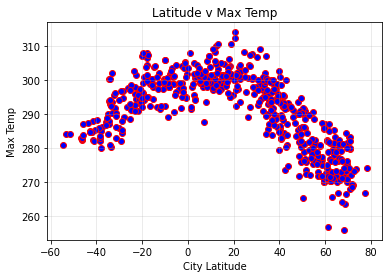

In [11]:
#Create Scatter plot for Latitude v Temp
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "blue", edgecolor = "red")

#Title
plt.title ("Latitude v Max Temp")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Max Temp")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Max Temp.png")
           
    

## Latitude vs. Humidity Plot

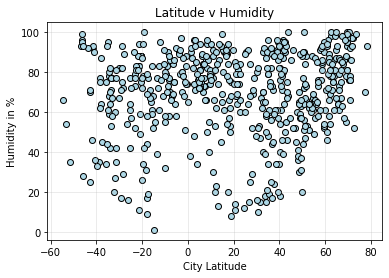

In [12]:
#Create Scatter plot for Latitude v Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "lightblue", edgecolor = "black")

#Title
plt.title ("Latitude v Humidity")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Humidity in %")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Humidity.png")

## Latitude vs. Cloudiness Plot

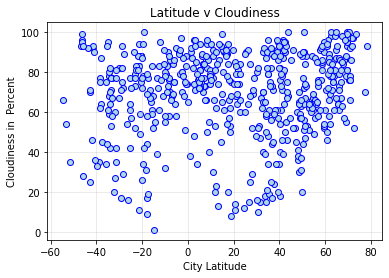

In [13]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "lightblue", edgecolor = "blue")
#Title
plt.title ("Latitude v Cloudiness")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness in  Percent")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Cloudiness.png")

## Latitude vs. Wind Speed Plot

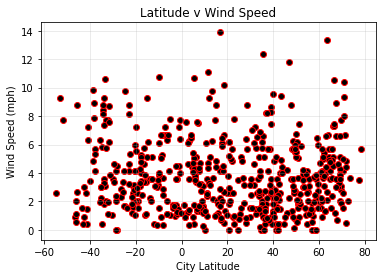

In [14]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "black", edgecolor = "red")
#Title
plt.title ("Latitude v Wind Speed")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Wind Speed.png")

## Linear Regression

In [27]:
# Define function for creating linear agression and scatter plot
def linear_regression(x_values,y_values):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    #eq = mx+b
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Plot, set r
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    #How Plot looks
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    
    #Print statement for R^2 value
    print(f"The r^2 is: {rvalue}")
    plt.show()
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [28]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = weather_df.loc[weather_df["Lat"]>0]
Southern_hemisphere = weather_df.loc[weather_df["Lat"]<0]

The r^2 is: -0.8466151805781591


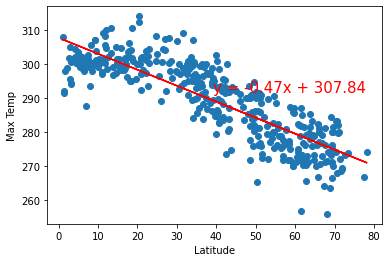

None


In [29]:
#Define X and Y
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]


#Label and diplay
plt.ylabel("Max Temp")
print(linear_regression(x_values,y_values))


In [30]:
#Print Correlation
print(f'There is a negative correlation.')

There is a negative correlation.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r^2 is: 0.7397668835346808


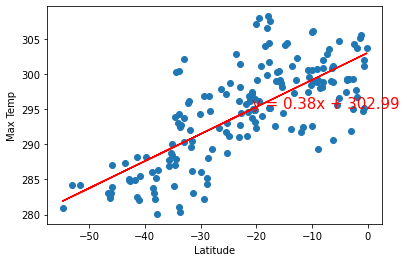

None


In [31]:
#Define X and Y
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]


#Label and diplay
plt.ylabel("Max Temp")
print(linear_regression(x_values,y_values))



In [32]:
#Print Correlation
print(f'There is a positive correlation.')

There is a positive correlation.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r^2 is: 0.09900522952241195


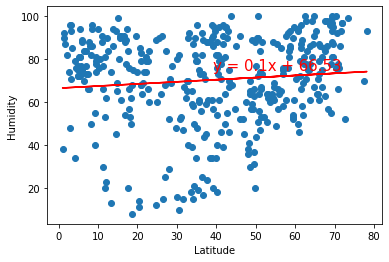

None


In [33]:
#Define X and Y
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]


#Label and diplay
plt.ylabel("Humidity")
print(linear_regression(x_values,y_values))


In [34]:
#Print Correlation
print(f'There is a weak positive correlation.')

There is a weak positive correlation.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r^2 is: 0.14285513986977616


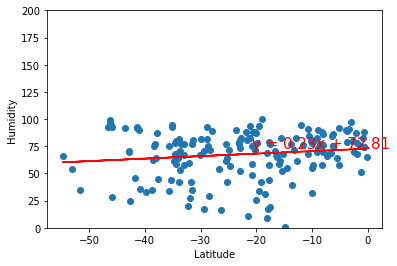

None


In [35]:
#Define X and Y
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity")

#Label and diplay
plt.ylabel("Humidity")
print(linear_regression(x_values,y_values))


In [36]:
#Print Correlation
print(f'There is a little if any correlation.')

There is a little if any correlation.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

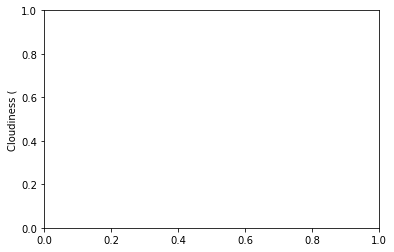

In [37]:
#Define X and Y
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]


#Label and diplay
plt.ylabel("Cloudiness (")
print(linear_regression(x_values,y_values))


In [38]:
#Print Correlation
print(f'There is a  correlation.')

There is a  correlation.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

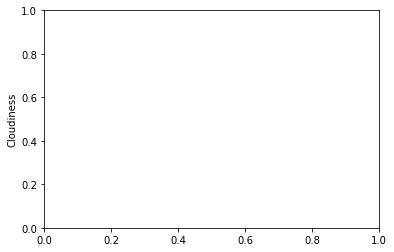

In [39]:
#Define X and Y
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]

#Label and diplay
plt.ylabel("Cloudiness")
print(linear_regression(x_values,y_values))

In [ ]:
#Print Correlation
print(f'There is a  correlation.')

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r^2 is: 0.04403697125233783


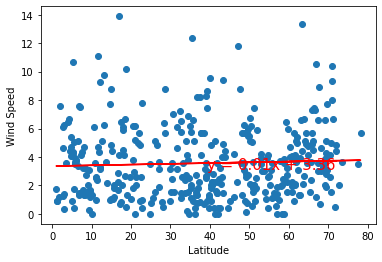

None


In [40]:
#Define X and Y
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]

#Label and diplay
plt.ylabel("Wind Speed")
print(linear_regresion(x_values,y_values))

In [41]:
#Print Correlation
print(f'There is a weak positive correlation.')

There is a weak positive correlation.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r^2 is: -0.10956134648292369


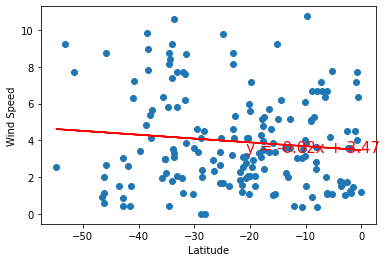

None


In [42]:
#Define X and Y
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]

#Label and diplay
plt.ylabel("Wind Speed")
print(linear_regression(x_values,y_values))

In [43]:
#Print Correlation
print(f'There is a weak negative correlation.')

There is a weak negative correlation.
